   CustomerID  Age  AnnualIncome  SpendingScore  Cluster
0           1   25         25000             30        2
1           2   45         60000             70        1
2           3   35         40000             50        0
3           4   23         20000             20        2
4           5   52         80000             90        1
5           6   40         50000             60        0


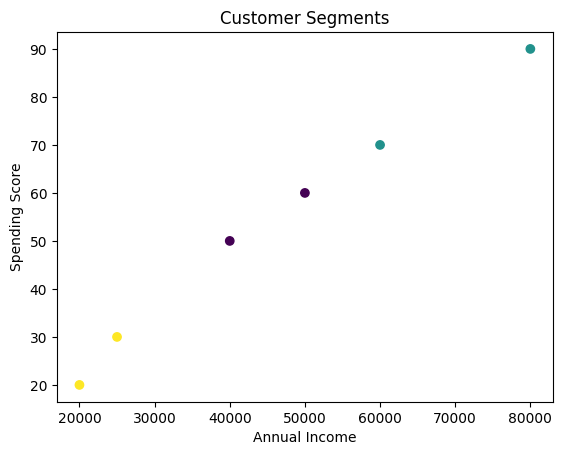

In [ ]:
# Example: Customer Segmentation for a Retail Company 🛍️
# Business Context
# A retail chain wants to understand its customers better. Instead of treating everyone the same,
# they want to group customers into segments (like “budget shoppers,” “loyal premium buyers,” etc.)
#  so they can:
# - Personalize marketing campaigns
# - Recommend products more effectively
# - Improve customer retention

# Dataset (simplified)
# Imagine we have customer data with features like:
# - Annual Income (numeric)
# - Spending Score (numeric, based on purchase behavior)
# - Age (numeric)

# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 2: Load sample data
data = {
    'CustomerID': [1,2,3,4,5,6],
    'Age': [25,45,35,23,52,40],
    'AnnualIncome': [25000,60000,40000,20000,80000,50000],
    'SpendingScore': [30,70,50,20,90,60]
}

df = pd.DataFrame(data)

# Step 3: Select features
X = df[['Age','AnnualIncome','SpendingScore']]

# Step 4: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 6: Inspect results
print(df)

# Step 7: Visualize clusters (Income vs SpendingScore)
plt.scatter(df['AnnualIncome'],
            df['SpendingScore'],
            c=df['Cluster'],
            cmap='viridis')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.show()

   PatientID  Age  BMI  HospitalVisits  ChronicConditions  Cluster
0        101   25   22               1                  0        2
1        102   60   30               5                  2        0
2        103   45   28               3                  1        0
3        104   30   24               2                  0        2
4        105   70   35               7                  3        1
5        106   50   27               4                  1        0


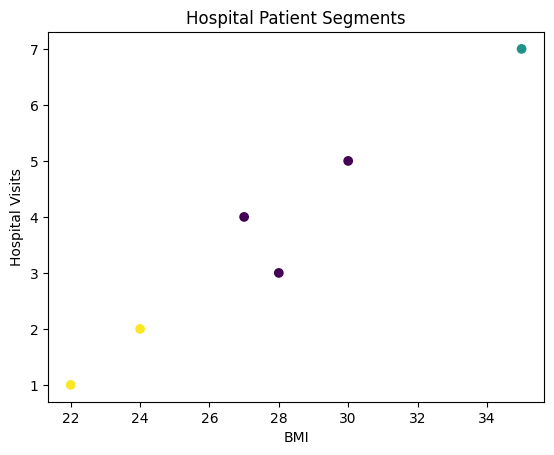

In [ ]:
# Example: Hospital Patient Segmentation 🏥
# Business Context
# A hospital wants to improve patient care and resource allocation. Instead of treating all
# patients the same, they want to group them into segments based on health and lifestyle data.
#  This helps with:
# - Designing personalized treatment plans
# - Predicting high‑risk patients
# - Managing hospital resources more efficiently

# Dataset (simplified)
# Features we might use:
# - Age
# - BMI (Body Mass Index)
# - Number of yearly hospital visits
# - Chronic conditions count

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = {
    'PatientID': [101,102,103,104,105,106],
    'Age': [25,60,45,30,70,50],
    'BMI': [22,30,28,24,35,27],
    'HospitalVisits': [1,5,3,2,7,4],
    'ChronicConditions': [0,2,1,0,3,1]
}

df = pd.DataFrame(data)

X = df[['Age','BMI','HospitalVisits','ChronicConditions']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(df)

plt.scatter(df['BMI'], df['HospitalVisits'], c=df['Cluster'], cmap='viridis')
plt.xlabel('BMI')
plt.ylabel('Hospital Visits')
plt.title('Hospital Patient Segments')
plt.show()

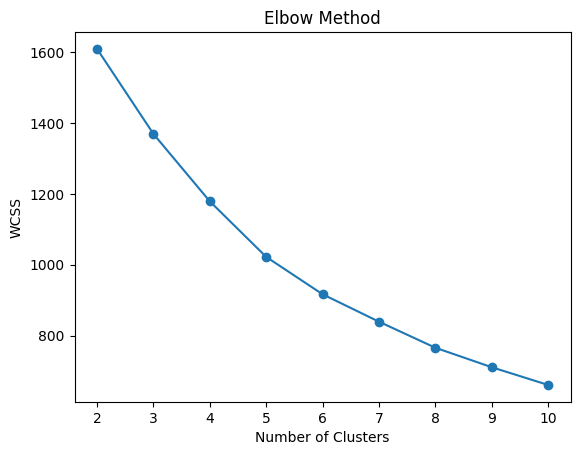

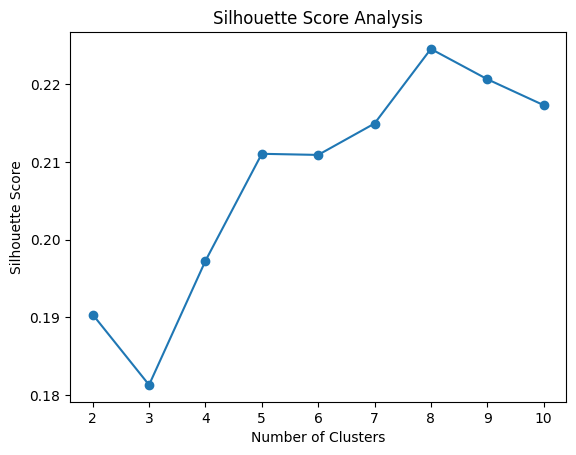

Optimal number of clusters: 8
   CustomerID  MonthlyBill  CallDuration  InternetUsage  SupportCalls  Cluster
0           1          122            92             76             9        0
1           2          199            93            242             0        6
2           3          112           334            118             9        7
3           4           34           446            155             2        3
4           5          126            61            120             1        1


In [ ]:
#Elbow Method/Analysis

# Scenario Question 💼
# A telecommunications company has collected data on 500 customers, including their monthly bill
# amount, average call duration, internet usage, and number of support calls. The company wants
# to group customers into meaningful segments to design targeted marketing campaigns and improve customer
#  service.
# You are tasked with:
# - Using K‑Means clustering to explore possible customer segments.
# - Applying the Elbow Method to determine where adding more clusters stops giving significant improvement.
# - Using the Silhouette Score to validate which number of clusters produces the most well‑separated
# and meaningful groups.


# Scenario Question 💼
# A telecommunications company has collected data on 500 customers, including their monthly bill amount, average call duration, internet usage, and number of support calls. The company wants to group customers into meaningful segments to design targeted marketing campaigns and improve customer service.
# You are tasked with:
# - Using K‑Means clustering to explore possible customer segments.
# - Applying the Elbow Method to determine where adding more clusters stops giving significant improvement.
# - Using the Silhouette Score to validate which number of clusters produces the most well‑separated and meaningful groups

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

np.random.seed(42)

data = {
    'CustomerID': range(1, 501),
    'MonthlyBill': np.random.randint(20, 200, 500),
    'CallDuration': np.random.randint(50, 500, 500),
    'InternetUsage': np.random.randint(10, 300, 500),
    'SupportCalls': np.random.randint(0, 10, 500)
}

df = pd.DataFrame(data)

X = df[['MonthlyBill', 'CallDuration', 'InternetUsage', 'SupportCalls']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure()
plt.plot(K, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

plt.figure()
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()

optimal_k = K[silhouette_scores.index(max(silhouette_scores))]

final_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = final_model.fit_predict(X_scaled)

print("Optimal number of clusters:", optimal_k)
print(df.head())

In [ ]:
# scaler = StandardScaler()
# X_scaled

# for k in K_range :
#   kmeans = KMeans(n_cluster = k,random_state = 42)
#   kmeans.fit


# plt.figure(figsize=(6,4))
# plt.plot(K_range,silhouette_scores,marker='o',color = 'green')
# plt.title('Silhoutte Analysis - Telecom Customers')
# plt.xlabel('Number of clusters (K)')
# plt.ylabel('Silhouette Score')
# plt.show()



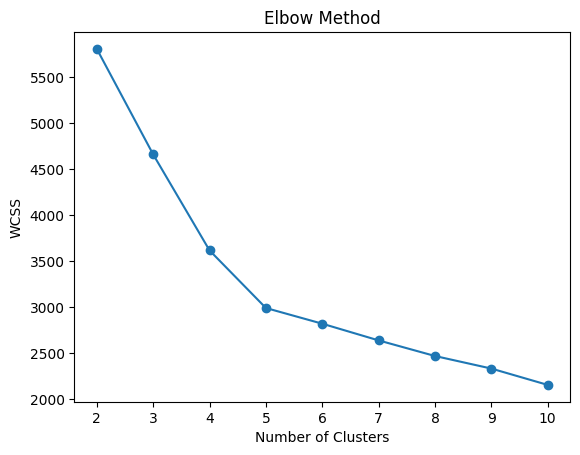

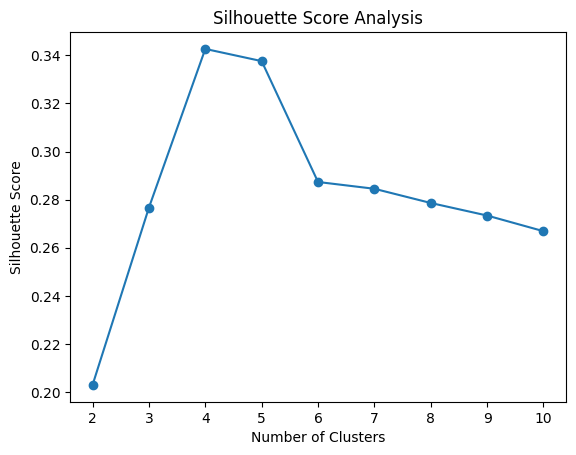

Optimal number of clusters: 4
   UserID  WatchTimePerWeek  DevicesUsed  SubscriptionPauses  \
0       1                39            3                   1   
1       2                29            4                   2   
2       3                15            1                   5   
3       4                 8            4                   0   
4       5                21            2                   3   

   PreferredGenre_Comedy  PreferredGenre_Drama  PreferredGenre_Romance  \
0                   True                 False                   False   
1                  False                  True                   False   
2                  False                 False                   False   
3                  False                  True                   False   
4                  False                  True                   False   

   PreferredGenre_SciFi  Cluster  
0                 False        1  
1                 False        0  
2                 False        1  


In [ ]:
# 🎬 Scenario: Movie Streaming Platform
# A movie streaming company has collected data on 1,000 users, including:
# - Average watch time per week
# - Preferred genres (action, comedy, drama, etc.)
# - Number of devices used (TV, phone, tablet)
# - Frequency of subscription pauses or cancellations
# The company wants to group users into meaningful segments to:
# - Recommend personalized movie lists
# - Design loyalty rewards for binge‑watchers
# - Identify users at risk of canceling subscriptions
# Your Tasks
# - Apply K‑Means clustering to explore possible user segments.
# - Example clusters: “Weekend binge‑watchers,” “Casual family viewers,” “Genre loyalists.”
# - Use the Elbow Method to find the point where adding more clusters doesn’t improve grouping much.
# - This helps decide whether 3, 4, or 5 clusters make sense.
# - Validate with Silhouette Score to check if the chosen clusters are well‑separated and meaningful.
# - Ensures that “binge‑watchers” aren’t mixed up with “casual viewers.”


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

np.random.seed(42)

n = 1000

data = {
    "UserID": range(1, n + 1),
    "WatchTimePerWeek": np.random.randint(1, 40, n),
    "PreferredGenre": np.random.choice(["Action", "Comedy", "Drama", "SciFi", "Romance"], n),
    "DevicesUsed": np.random.randint(1, 5, n),
    "SubscriptionPauses": np.random.randint(0, 6, n)
}

df = pd.DataFrame(data)

df = pd.get_dummies(df, columns=["PreferredGenre"], drop_first=True)

X = df.drop("UserID", axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure()
plt.plot(K, wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

plt.figure()
plt.plot(K, sil_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")
plt.show()

optimal_k = K[sil_scores.index(max(sil_scores))]

final_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = final_model.fit_predict(X_scaled)

print("Optimal number of clusters:", optimal_k)
print(df.head())

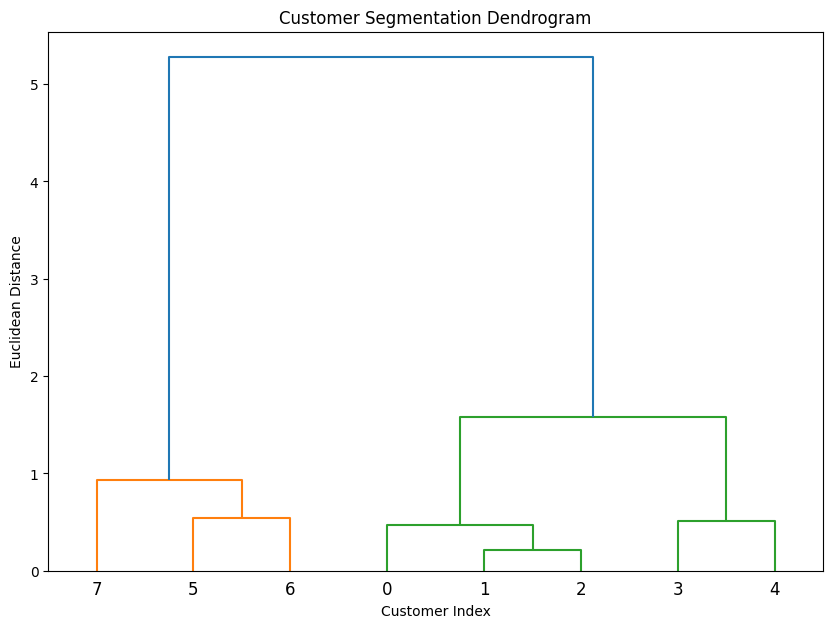

In [10]:
# Hierarchircal Clustering

# Scenario Question 💼
# A retail bank wants to understand its customers better. They have
# collected data on Age and Annual Income for a sample of customers.
#  The goal is to group customers into meaningful segments so the bank can
#  design targeted loan offers, personalized investment plans, and marketing campaigns.


import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

data = np.array([
    [25, 15000],
    [28, 16000],
    [30, 18000],
    [35, 22000],
    [40, 25000],
    [45, 60000],
    [50, 65000],
    [55, 70000]
])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

Z = linkage(data_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Customer Segmentation Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Euclidean Distance')
plt.show()

Cluster labels: [2 2 2 1 1 0 0 0]


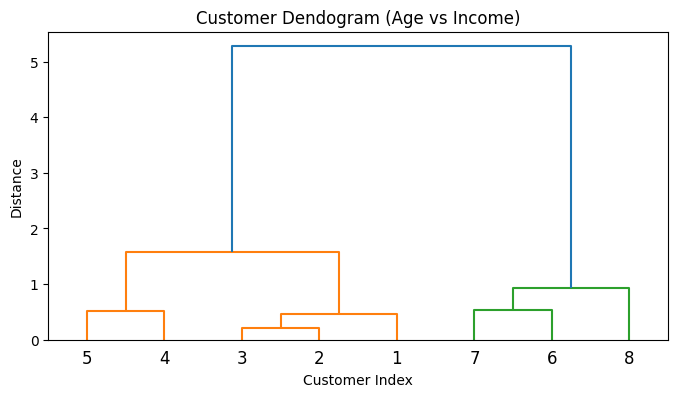

In [9]:
# Hierarchircal Clustering

# Scenario Question 💼
# A retail bank wants to understand its customers better. They have
# collected data on Age and Annual Income for a sample of customers.
#  The goal is to group customers into meaningful segments so the bank can
#  design targeted loan offers, personalized investment plans, and marketing campaigns.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.preprocessing import StandardScaler

data = np.array([
    [25, 15000],
    [28, 16000],
    [30, 18000],
    [35, 22000],
    [40, 25000],
    [45, 60000],
    [50, 65000],
    [55, 70000]
])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

hierarchical_cluster = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)

cluster_labels = hierarchical_cluster.fit_predict(data_scaled)
print("Cluster labels:",cluster_labels)

linked = linkage(data_scaled,method='ward')
plt.figure(figsize=(8,4))
dendrogram(linked,
           orientation='top',
           labels=range(1,len(data_scaled) + 1),
           distance_sort = 'descending',
           show_leaf_counts =True)
plt.title("Customer Dendogram (Age vs Income)")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.show()

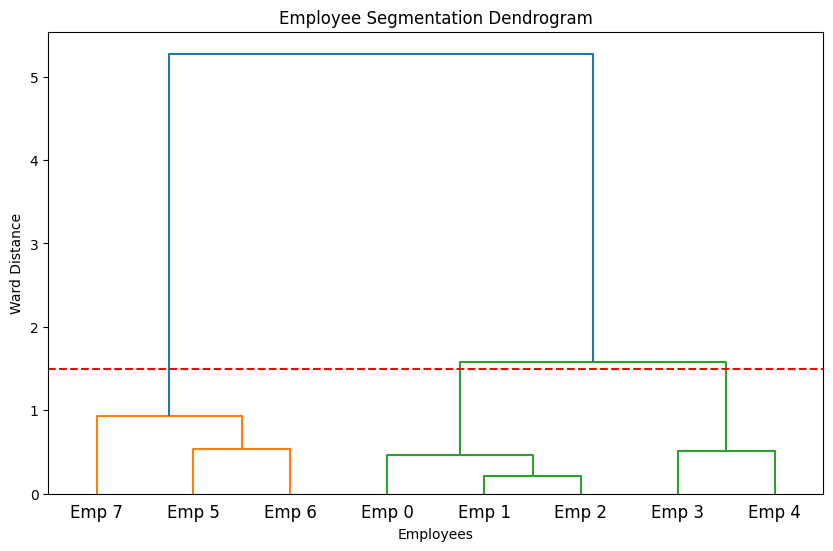

In [11]:
# Scenario: Employee Segmentation in a Tech Company 💻
# Business Problem
# A tech company wants to understand its employees better to design training programs
# and salary structures. They collected data on each employee’s Age and Annual Salary.
# Management believes employees can be grouped into clusters such as:
# - Young, entry‑level employees
# - Mid‑career professionals
# - Senior, high‑earning employees
# They decide to use hierarchical clustering to explore these segments.


# data = np.array([
#     [25, 15000],
#     [28, 16000],
#     [30, 18000],
#     [35, 22000],
#     [40, 25000],
#     [45, 60000],
#     [50, 65000],
#     [55, 70000]
# ])

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

data = np.array([
    [25, 15000],
    [28, 16000],
    [30, 18000],
    [35, 22000],
    [40, 25000],
    [45, 60000],
    [50, 65000],
    [55, 70000]
])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

Z = linkage(data_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(Z, labels=[f"Emp {i}" for i in range(len(data))])
plt.title('Employee Segmentation Dendrogram')
plt.xlabel('Employees')
plt.ylabel('Ward Distance')
plt.axhline(y=1.5, color='r', linestyle='--')
plt.show()